In [1]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### 加载数据集

In [3]:
data_dir = 'u.data' 
N, M, data_list, _ = load_data(file_dir=data_dir)
print(' data length: %d \n user number: %d \n item number: %d' %(len(data_list),N,M))

 data length: 100000 
 user number: 943 
 item number: 1682


### 分割数据集

In [4]:
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

train length: 80000 
 test length: 20000


### 将 list 转换成 矩阵

In [5]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

### 参数设置

In [6]:
users_num = N            #用户数
items_num = M            #商品数
hidden_size = 500        #隐层节点数目，即用户的嵌入空间维度
batch_size = 256         #batch大小
lamda_regularizer = 1e-3 #正则项系数
learning_rate = 1e-3  #学习率
epoches  = 100
embedding_size = 8

### 4. AutoRec
- 基于用户的 autorec 模型

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

epoch:0  loss=18.8651; 
 MAE=2.6330; RMSE=3.0370; Recall=0.0136; Precision=0.0288
epoch:10  loss=7.6245; 
 MAE=0.9143; RMSE=1.1499; Recall=0.0200; Precision=0.0425
epoch:20  loss=5.7610; 
 MAE=0.8757; RMSE=1.0999; Recall=0.0251; Precision=0.0532
epoch:30  loss=4.4478; 
 MAE=0.8625; RMSE=1.0831; Recall=0.0276; Precision=0.0585
epoch:40  loss=3.5260; 
 MAE=0.8517; RMSE=1.0692; Recall=0.0295; Precision=0.0627
epoch:50  loss=2.8786; 
 MAE=0.8467; RMSE=1.0608; Recall=0.0317; Precision=0.0672
epoch:60  loss=2.3199; 
 MAE=0.8411; RMSE=1.0526; Recall=0.0331; Precision=0.0701
epoch:70  loss=1.9357; 
 MAE=0.8361; RMSE=1.0452; Recall=0.0341; Preci

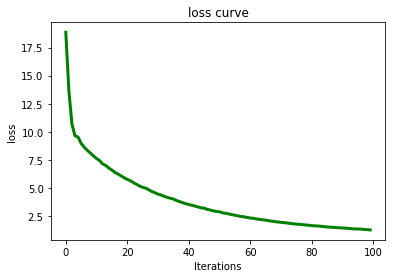

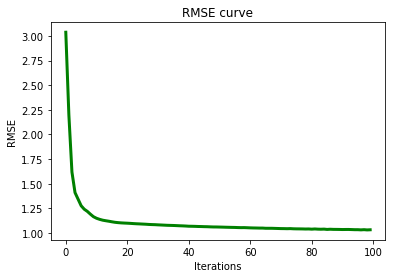

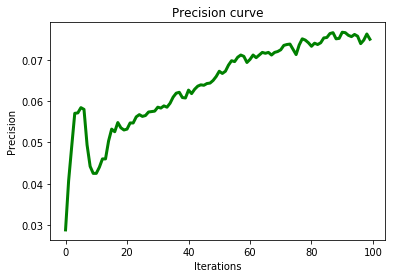

In [8]:
from autorec import *
model = autorec(users_num = users_num,
                items_num = items_num,
                hidden_size = hidden_size,
                batch_size = batch_size,
                learning_rate = learning_rate,
                lamda_regularizer = lamda_regularizer)

records_list = []
for epoch in range(epoches):
    data_mat = np.random.permutation(train_mat) 
    loss = model.train(data_mat=data_mat)
    pred_mat = model.predict_ratings(data_mat=train_mat)
    mae, rmse, recall, precision = evaluation(pred_mat, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')

### AutoRec
- 基于商品的 autorec 模型

epoch:0  loss=10.7907; 
 MAE=1.8668; RMSE=2.2791; Recall=0.0263; Precision=0.0558
epoch:10  loss=4.6436; 
 MAE=0.8386; RMSE=1.0554; Recall=0.0269; Precision=0.0571
epoch:20  loss=3.4677; 
 MAE=0.8108; RMSE=1.0192; Recall=0.0316; Precision=0.0671
epoch:30  loss=2.5619; 
 MAE=0.7967; RMSE=1.0015; Recall=0.0396; Precision=0.0839
epoch:40  loss=1.9504; 
 MAE=0.7887; RMSE=0.9916; Recall=0.0467; Precision=0.0992
epoch:50  loss=1.5433; 
 MAE=0.7848; RMSE=0.9860; Recall=0.0524; Precision=0.1111
epoch:60  loss=1.2597; 
 MAE=0.7797; RMSE=0.9803; Recall=0.0558; Precision=0.1185
epoch:70  loss=1.0606; 
 MAE=0.7759; RMSE=0.9760; Recall=0.0574; Precision=0.1217
epoch:80  loss=0.9211; 
 MAE=0.7773; RMSE=0.9776; Recall=0.0586; Precision=0.1243
epoch:90  loss=0.8355; 
 MAE=0.7719; RMSE=0.9721; Recall=0.0599; Precision=0.1269


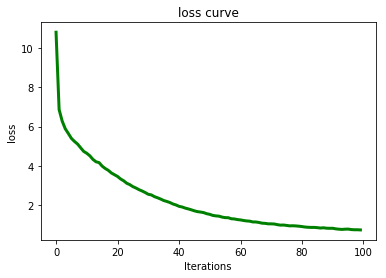

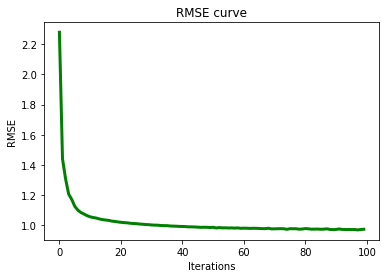

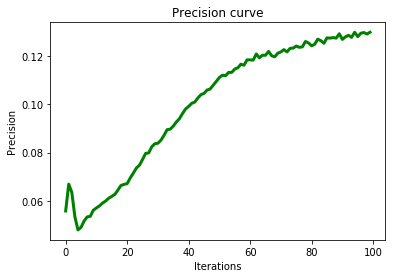

In [9]:
model = autorec(users_num = items_num,
                items_num = users_num,
                hidden_size = hidden_size,
                batch_size = batch_size,
                learning_rate = learning_rate,
                lamda_regularizer = lamda_regularizer)

records_list = []
for epoch in range(epoches):
    data_mat = np.random.permutation(train_mat.T) 
    loss = model.train(data_mat=data_mat)
    pred_mat = model.predict_ratings(data_mat=train_mat.T)
    mae, rmse, recall, precision = evaluation(pred_mat.T, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')